In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


EDA

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>,
        <AxesSubplot:title={'center':'E'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

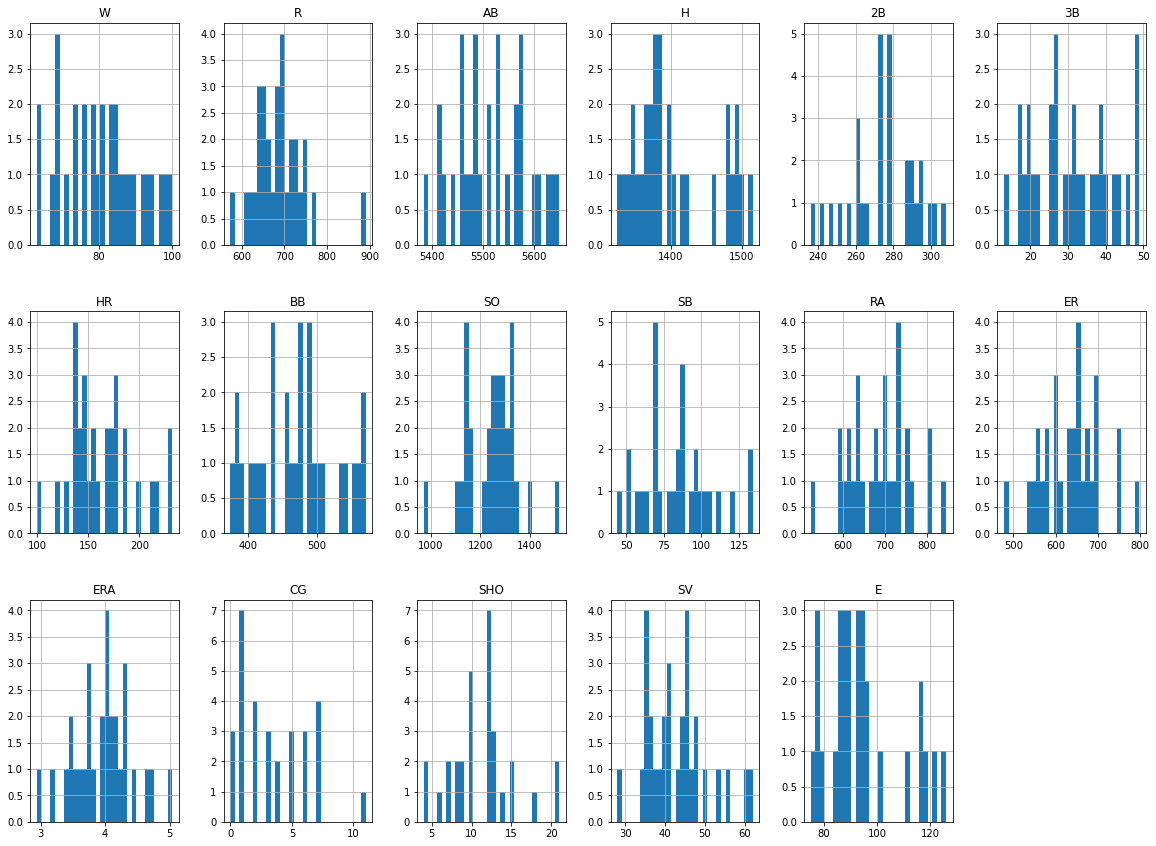

In [6]:
df.hist(figsize=(20,20), grid=True, layout=(4,6), bins=30)

We can observe data has skewness as data is not normally distributed for few columns.

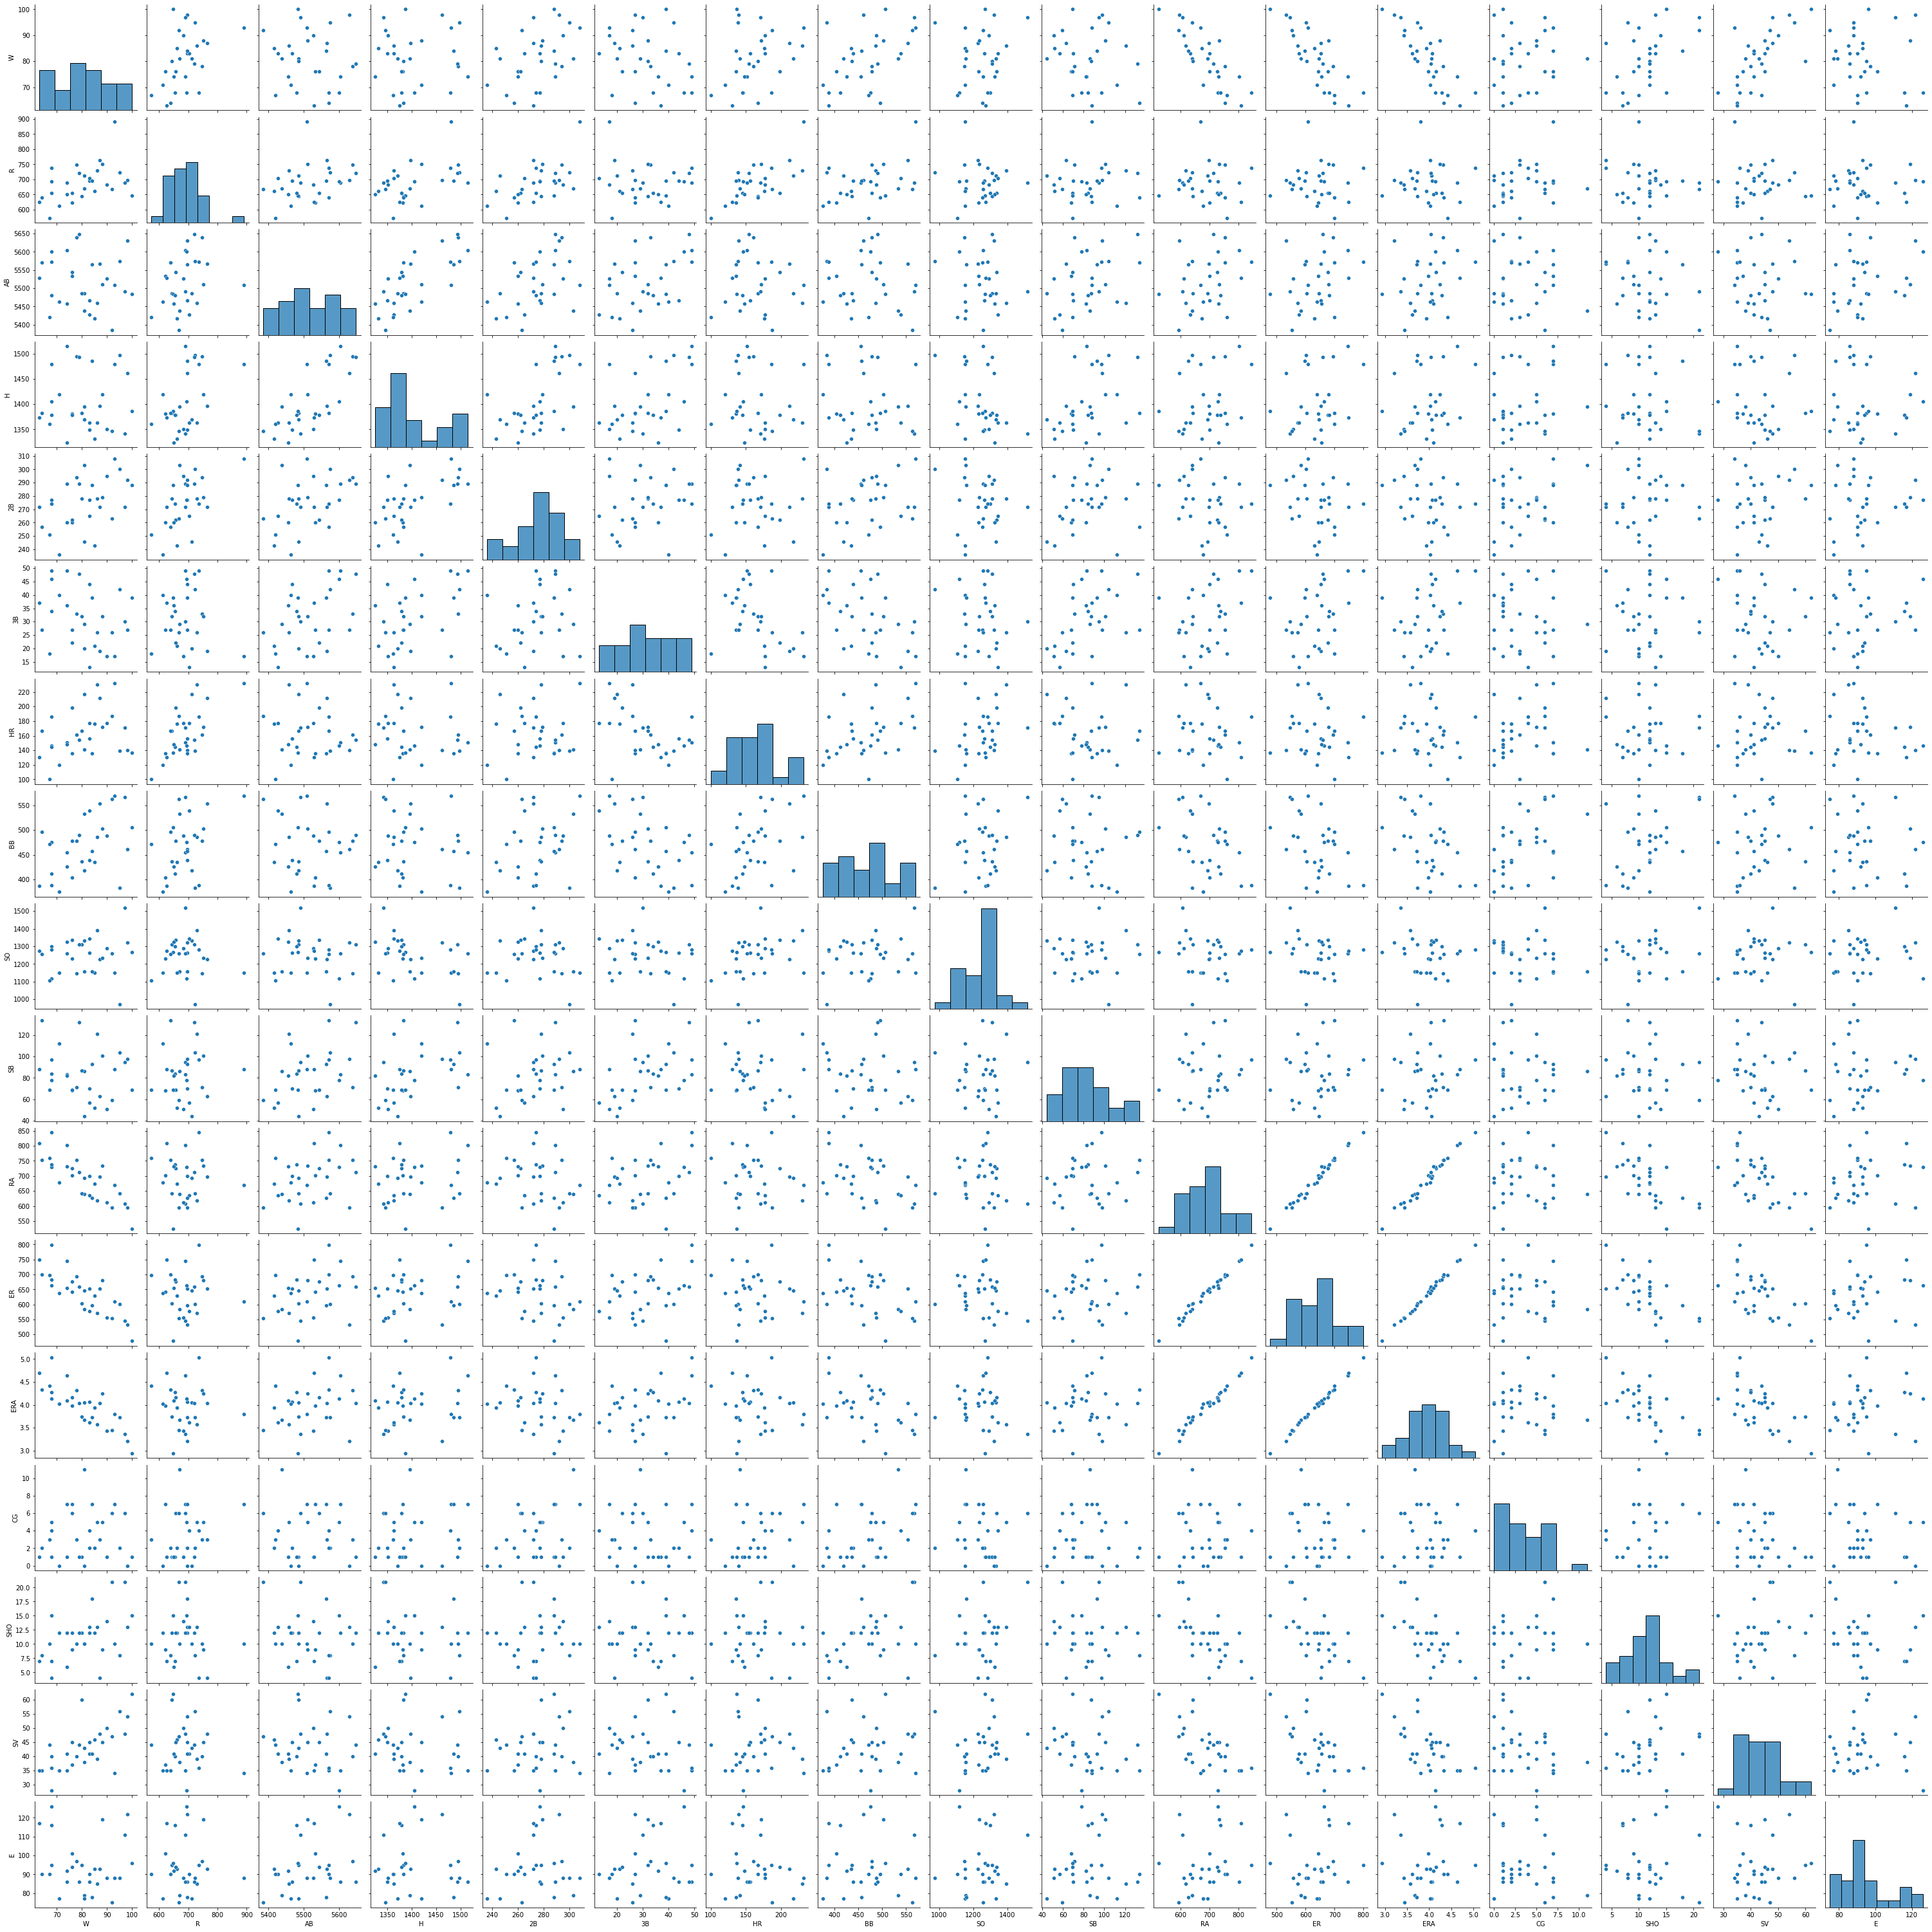

In [7]:
sns.pairplot(df)

In [8]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


<AxesSubplot:xlabel='R', ylabel='W'>

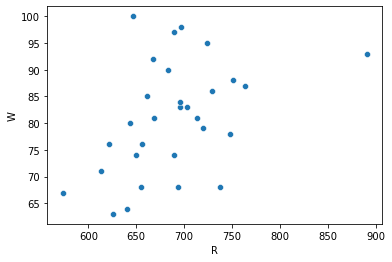

In [10]:
sns.scatterplot(x='R', y='W',data=df)

We can observer positive correlation between these variable.

<AxesSubplot:xlabel='AB', ylabel='W'>

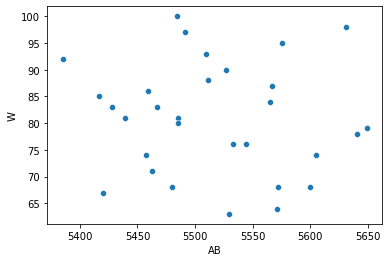

In [12]:
sns.scatterplot(x='AB', y='W',data=df)

There is specific pattern and there is no linear relation between the variables.

<AxesSubplot:xlabel='H', ylabel='W'>

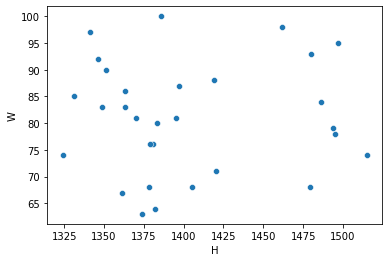

In [13]:
sns.scatterplot(x='H', y='W',data=df)

There is specific pattern and there is no linear relation between the variables.

<AxesSubplot:xlabel='2B', ylabel='W'>

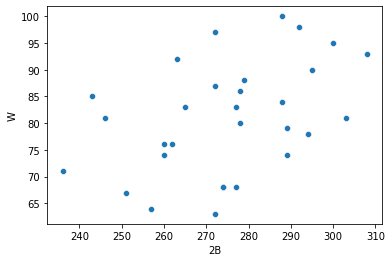

In [14]:
sns.scatterplot(x='2B', y='W',data=df)

We can observe slightly linear relationship between variables.

<AxesSubplot:xlabel='3B', ylabel='W'>

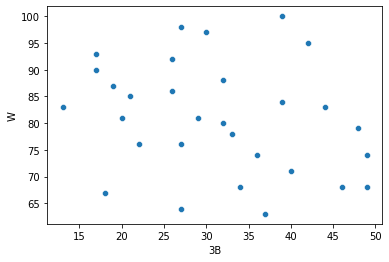

In [15]:
sns.scatterplot(x='3B', y='W',data=df)

There is specific pattern and there is no linear relation between the variables.

<AxesSubplot:xlabel='HR', ylabel='W'>

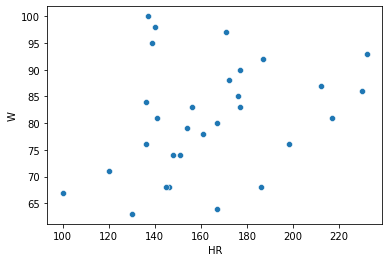

In [29]:
sns.scatterplot(x='HR', y='W',data=df)

Data seems to have linear relation.

<AxesSubplot:xlabel='BB', ylabel='W'>

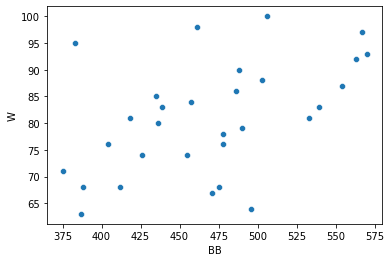

In [17]:
sns.scatterplot(x='BB', y='W',data=df)

<AxesSubplot:xlabel='SO', ylabel='W'>

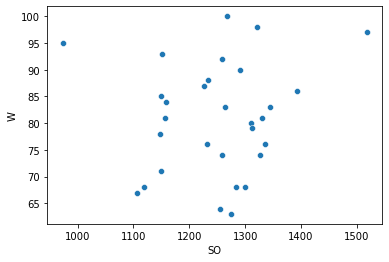

In [18]:
sns.scatterplot(x='SO', y='W',data=df)

<AxesSubplot:xlabel='SB', ylabel='W'>

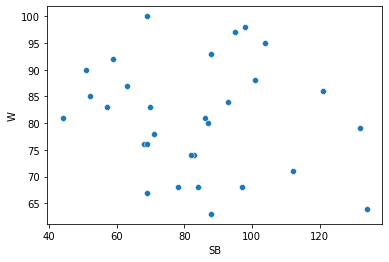

In [19]:
sns.scatterplot(x='SB', y='W',data=df)

<AxesSubplot:xlabel='RA', ylabel='W'>

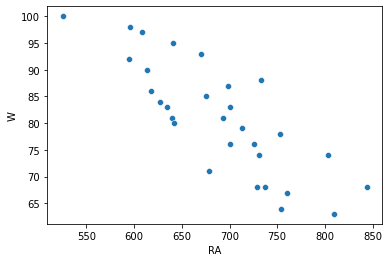

In [20]:
sns.scatterplot(x='RA', y='W',data=df)

This shows variables are negatively correlated.

<AxesSubplot:xlabel='ER', ylabel='W'>

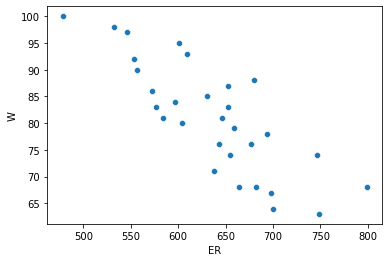

In [21]:
sns.scatterplot(x='ER', y='W',data=df)

This shows variables are negatively correlated.

<AxesSubplot:xlabel='ERA', ylabel='W'>

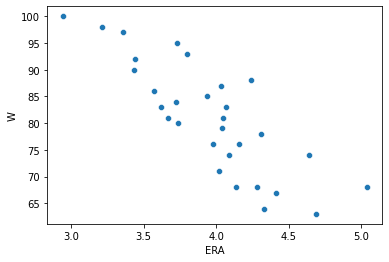

In [22]:
sns.scatterplot(x='ERA', y='W',data=df)

<AxesSubplot:xlabel='CG', ylabel='W'>

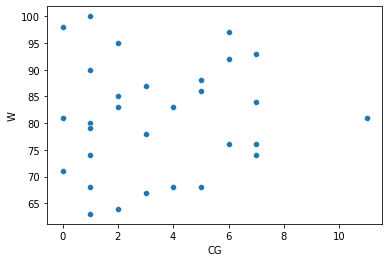

In [23]:
sns.scatterplot(x='CG', y='W',data=df)

<AxesSubplot:xlabel='SHO', ylabel='W'>

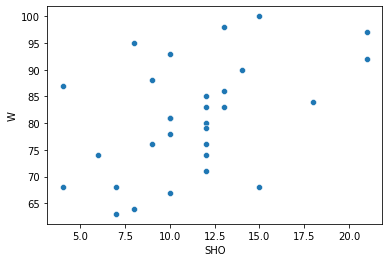

In [24]:
sns.scatterplot(x='SHO', y='W',data=df)

<AxesSubplot:xlabel='SV', ylabel='W'>

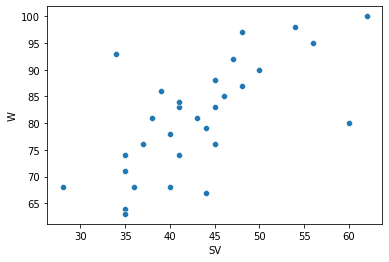

In [25]:
sns.scatterplot(x='SV', y='W',data=df)

Columns are positively correlated.

<AxesSubplot:xlabel='E', ylabel='W'>

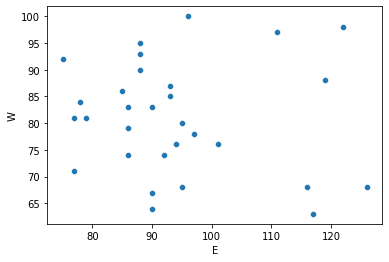

In [30]:
sns.scatterplot(x='E', y='W',data=df)

columns doesnt seem to have linear relationship.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


No null values present in data.

In [32]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Key Observations:
1) Few columns have difference between mean and 50% values hence skewness is present in data.
2) There is difference between 75% and max values hence there is possibility of outliers.

CHecking Correlation

In [36]:
df.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

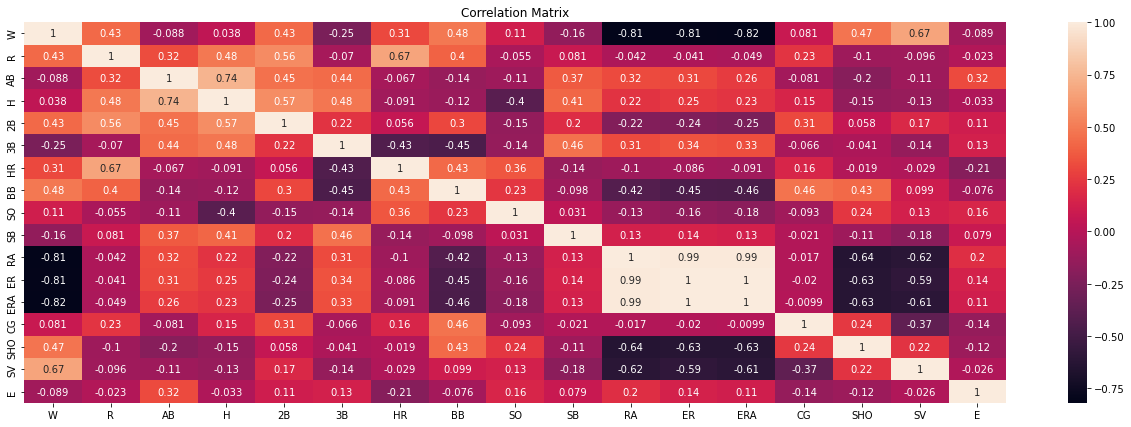

In [35]:
corr_mat = df.corr()
plt.figure(figsize=[22,7])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

Observations:
1) SV is highly positively correlated column.
2) ERA is highly negatively correlated column.

Checking multicollinearity

In [42]:
x = df.drop(['W'],axis=1)
y = df['W']

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.5398062 , -0.81462859,  1.67160651, -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985, -0.5398062 ,  0.1728    ,  0.24987932, -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313,  2.77264091, -0.32091429, -0.65485616, -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  1.3004422 , -0.56777144, -0.78410408,  0.48575751],
       [ 0.01327008,  1.28073815,  1.98408098,  0.80189192,  1.72234737,
        -0.40377019, -0.25136033,  0.10586628, 

In [44]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,11.375311,R
1,4.464580,AB
2,9.162137,H
3,3.896371,2B
4,3.254143,3B
5,9.741435,HR
6,3.804402,BB
7,2.652395,SO
8,1.895026,SB
9,171.126556,RA


In [40]:
df.drop(['ERA'],axis=1,inplace=True)

Due to multicollinearity we have dropped ERA column. It was also highly negatively correlated to W column.

Checking Skewness

In [45]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [46]:
columns = ('R','H','CG','SHO','SV','E')

for col in columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [47]:
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

We can observe skewness has been reduced and lies between range 0.04 to 0.75

Checking outliers

W         AxesSubplot(0.125,0.787927;0.133621x0.0920732)
R      AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
AB      AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
H      AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
2B     AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
3B        AxesSubplot(0.125,0.677439;0.133621x0.0920732)
HR     AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
BB      AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
SO     AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
SB     AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
RA        AxesSubplot(0.125,0.566951;0.133621x0.0920732)
ER     AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
CG      AxesSubplot(0.44569,0.566951;0.133621x0.0920732)
SHO    AxesSubplot(0.606034,0.566951;0.133621x0.0920732)
SV     AxesSubplot(0.766379,0.566951;0.133621x0.0920732)
E         AxesSubplot(0.125,0.456463;0.133621x0.0920732)
dtype: object

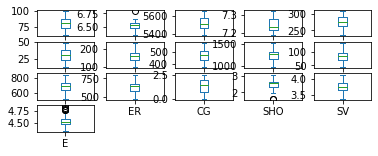

In [48]:
df.plot(kind='box',subplots=True,layout=(7,5))

We can observe outliers are present hence we will remove the outliers now.

In [49]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [50]:
df = df[(z<3).all(axis=1)]
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E
0,95,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,1.098612,2.197225,4.043051,4.488636
1,83,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,1.098612,2.564949,3.828641,4.465908
2,81,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,2.484907,2.397895,3.663562,4.382027
3,76,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,2.079442,2.302585,3.637586,4.624973
4,74,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,2.079442,2.564949,3.583519,4.465908
6,87,6.639876,5567,7.242798,272,19,212,554,1227,63,698,652,1.386294,1.609438,3.891820,4.543295
7,81,6.570883,5485,7.223296,246,20,217,418,1331,44,693,646,0.000000,2.397895,3.784190,4.356709
8,80,6.469250,5485,7.232733,278,32,167,436,1310,87,642,604,0.693147,2.564949,4.110874,4.564348
9,78,6.618739,5640,7.310550,294,33,161,478,1148,71,753,694,1.386294,2.397895,3.713572,4.584967
10,88,6.622736,5511,7.258412,279,32,172,503,1233,101,733,680,1.791759,2.302585,3.828641,4.787492


In [51]:
df.shape

(29, 16)

%Percentage data loss

In [52]:
Data_loss=((30-29)/30)*100
Data_loss

3.3333333333333335

Model Building

In [54]:
model = [DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),SVR()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        R2Score = r2_score(y_test,prediction)
        print("R2 score for random state: ", i, " is ",R2Score)
print()
print()
print()
print()

R2 score for random state:  0  is  -0.20400530823983587
R2 score for random state:  0  is  0.4240559778019064
R2 score for random state:  0  is  0.7974147678804624
R2 score for random state:  0  is  -0.050704303278515495
R2 score for random state:  1  is  -0.696543927648579
R2 score for random state:  1  is  0.40287467700258406
R2 score for random state:  1  is  0.2713509612164363
R2 score for random state:  1  is  -0.05284904776535182
R2 score for random state:  2  is  0.07081920032891353
R2 score for random state:  2  is  0.4881282762873884
R2 score for random state:  2  is  -0.07522762474104061
R2 score for random state:  2  is  -0.035463967690872567
R2 score for random state:  3  is  0.5715195922268239
R2 score for random state:  3  is  0.4029308697037277
R2 score for random state:  3  is  0.2894678074584459
R2 score for random state:  3  is  -0.0214393319903603
R2 score for random state:  4  is  0.012795768103510019
R2 score for random state:  4  is  0.1998284366287797
R2 score fo

We can observe the highest R2 Score:0.7067071958570126 is at random state 7 and for model: LinearRegression.

Best Parameter

In [57]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=7)
lr = LinearRegression()
parameters={'n_jobs':range(0,30)}
gridsearch =GridSearchCV(lr,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'n_jobs': 0}

In [60]:
LR = LinearRegression(n_jobs=0)
LR.fit(x_train,y_train)
predictions = LR.predict(x_test)
r2Score = r2_score(y_test,predictions)
print("R2 Score is: ",r2Score)

R2 Score is:  0.7067071958570126


Regression Metrics

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error: ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error: ",mean_squared_error(y_test,predictions))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,predictions)))

Mean Absolute Error:  4.640670059819678
Mean Squared Error:  31.804671681265553
Root Mean Squared Error:  5.639563075386741
